In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
%matplotlib inline

#### Static 

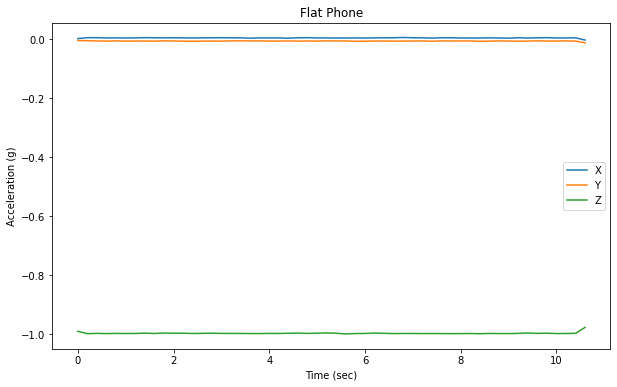

In [15]:
data = pd.read_csv('data/flat_phone.csv', sep=';')

fig , ax = plt.subplots(figsize=(10, 6))

for axis in ['x','y','z']:
    
    ax.plot(data['index'] / 5, data[axis], label=axis.upper())
    ax.set_xlabel('Time (sec)')
    ax.set_ylabel('Acceleration (g)')
    ax.set_title('Flat Phone')
    
ax.legend()
plt.show()

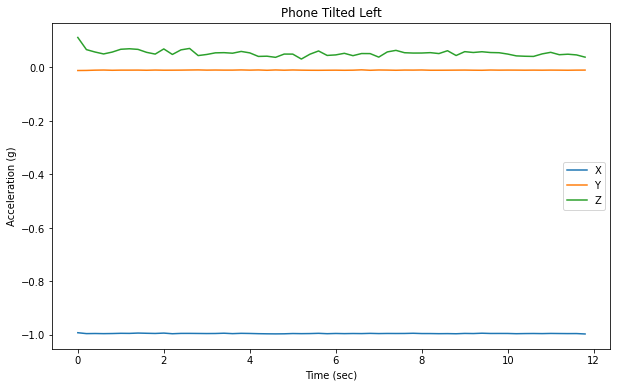

In [16]:
data = pd.read_csv('data/left_phone.csv', sep=';')

fig , ax = plt.subplots(figsize=(10, 6))

for axis in ['x','y','z']:
    
    ax.plot(data['index'] / 5, data[axis], label=axis.upper())
    ax.set_xlabel('Time (sec)')
    ax.set_ylabel('Acceleration (g)')
    ax.set_title('Phone Tilted Left')
    
ax.legend()
plt.show()

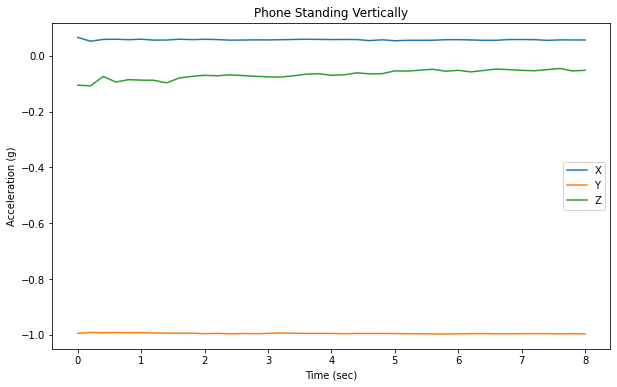

In [17]:
data = pd.read_csv('data/vertical_phone.csv', sep=';')

fig , ax = plt.subplots(figsize=(10, 6))

for axis in ['x','y','z']:
    
    ax.plot(data['index'] / 5, data[axis], label=axis.upper())
    ax.set_xlabel('Time (sec)')
    ax.set_ylabel('Acceleration (g)')
    ax.set_title('Phone Standing Vertically')
    
ax.legend()
plt.show()

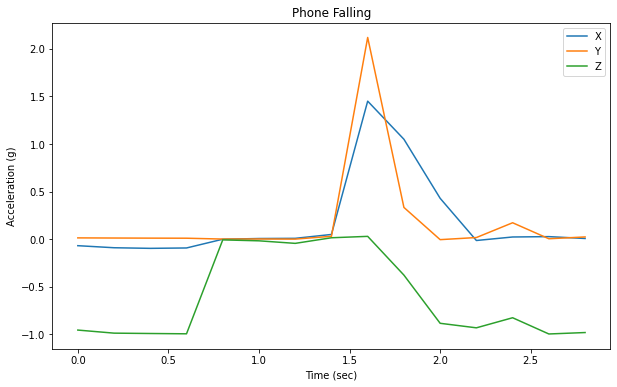

In [18]:
data = pd.read_csv('data/drop_phone.csv', sep=';')

fig , ax = plt.subplots(figsize=(10, 6))

for axis in ['x','y','z']:
    
    ax.plot(data['index'] / 5, data[axis], label=axis.upper())
    ax.set_xlabel('Time (sec)')
    ax.set_ylabel('Acceleration (g)')
    ax.set_title('Phone Falling')
    
ax.legend()
plt.show()

#### Animations

In [21]:
data = pd.read_csv('data/moving_positions.csv', sep=';')
data

,index,x,y,z
0,0,0.007645,-0.010162,-0.999039
1,1,0.007706,-0.009689,-0.995346
2,2,0.009140,-0.009705,-0.997452
3,3,0.007889,-0.009109,-0.997162
4,4,0.005295,-0.010544,-0.999634
...,...,...,...,...
447,447,-0.038086,-0.996918,-0.037430
448,448,-0.030945,-0.999023,-0.029617
449,449,-0.031937,-0.997696,-0.038589
450,450,-0.032272,-0.998947,-0.024628


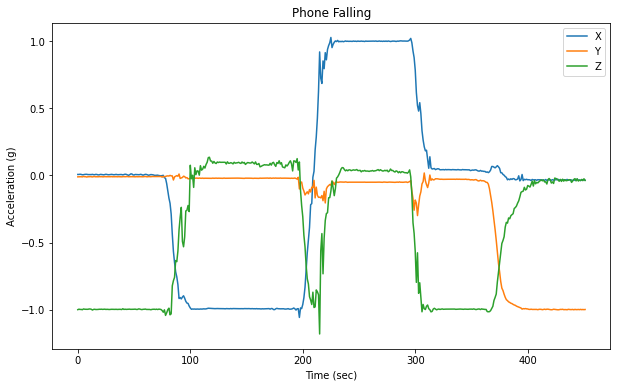

In [25]:
fig , ax = plt.subplots(figsize=(10, 6))

for axis in ['x','y','z']:
    
    ax.plot(data['index'], data[axis], label=axis.upper())
    ax.set_xlabel('Time (sec)')
    ax.set_ylabel('Acceleration (g)')
    ax.set_title('Phone Falling')
    
ax.legend()
plt.show()

In [35]:
activity1 = ['Flat']*90
activity2 = ['Left Side']*130
actitvity3 = ['Right Side']*90
activity4 = ['Flat']*70
activity5 = ['Vertical']*72

activity = activity1+activity2+actitvity3+activity4+activity5

data['activity'] = activity
data

,index,x,y,z,activity
0,0,0.007645,-0.010162,-0.999039,Flat
1,1,0.007706,-0.009689,-0.995346,Flat
2,2,0.009140,-0.009705,-0.997452,Flat
3,3,0.007889,-0.009109,-0.997162,Flat
4,4,0.005295,-0.010544,-0.999634,Flat
...,...,...,...,...,...
447,447,-0.038086,-0.996918,-0.037430,Vertical
448,448,-0.030945,-0.999023,-0.029617,Vertical
449,449,-0.031937,-0.997696,-0.038589,Vertical
450,450,-0.032272,-0.998947,-0.024628,Vertical


In [50]:
def stream_acc(t=0):
    
    fig , ax = plt.subplots(figsize=(10, 6))
    for axis in ['x','y','z']:
        
        if t >=30:
            
            lower = t - 30
            
        else:
            
            lower = 0
    
        ax.plot(data['index'].values[lower:t] / 20, data[axis].values[lower:t], label=axis.upper())
        ax.set_xlabel('Time (sec)')
        ax.set_ylabel('Acceleration (g)')
        ax.legend(loc='center right')
        
        if t > 0 and t < len(data):
            ax.set_title(f'{data["activity"].values[lower:t][-1]}')
       

In [51]:
widgets.interact(stream_acc, t=widgets.Play(min=0, max=len(data), step=2))

interactive(children=(Play(value=0, description='t', max=452), Output()), _dom_classes=('widget-interact',))

<function __main__.stream_acc(t=0)>

In [52]:
data = pd.read_csv('data/falling_20hz.csv', sep=';')
data

,index,x,y,z
0,0,-0.199799,-0.024323,-0.920303
1,1,-0.219376,-0.025330,-0.985321
2,2,-0.225510,-0.016678,-1.029099
3,3,-0.205734,-0.006134,-0.996994
4,4,-0.194748,-0.016296,-0.983017
...,...,...,...,...
78,78,0.042496,-0.016159,-0.976212
79,79,0.030640,-0.012146,-0.962463
80,80,0.034821,-0.006912,-0.930450
81,81,-0.028107,-0.010437,-1.122223


In [59]:
def stream_acc2(t=0):
    
    fig , ax = plt.subplots(figsize=(10, 6))
    for axis in ['x','y','z']:
        
        if t >=30:
            
            lower = t - 30
            
        else:
            
            lower = 0
    
        ax.plot(data['index'].values[lower:t] / 20, data[axis].values[lower:t], label=axis.upper())
        ax.set_xlabel('Time (sec)')
        ax.set_ylabel('Acceleration (g)')
        ax.legend(loc='center right')
        ax.set_ylim(-2, 2)
        
       
        ax.set_title(f'Dropping Phone')

In [60]:
widgets.interact(stream_acc2, t=widgets.Play(min=0, max=len(data)-10, step=1))

interactive(children=(Play(value=0, description='t', max=73), Output()), _dom_classes=('widget-interact',))

<function __main__.stream_acc2(t=0)>